In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/Signs (1) (1).csv')
# Display the first few rows of the dataset
print(df.head())

# Get summary statistics of numerical columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Get data types of each column
print(df.dtypes)

    Sign         x         y    Z  Roll  Fore  Index  Ring  Little
0  alive -0.007812  0.000000  0.0   0.0  0.50   0.50  0.50    0.50
1  alive -0.023438 -0.007812  0.0   0.0  0.50   0.50  0.50    0.50
2  alive -0.031250 -0.015625  0.0   0.0  0.50   0.50  0.50    0.50
3  alive  0.000000  0.000000  0.0   0.0  0.75   0.75  0.75    0.75
4  alive  0.007812  0.000000  0.0   0.0  0.75   0.75  0.75    0.75
                  x             y             Z          Roll          Fore  \
count  21006.000000  21006.000000  21006.000000  21006.000000  21006.000000   
mean       0.002600     -0.000984      0.000428      0.037707      0.612028   
std        0.020826      0.019225      0.001929      0.088249      0.216363   
min       -0.296875     -0.453125     -0.015625      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.500000   
50%        0.000000      0.000000      0.000000      0.000000      0.750000   
75%        0.007812      0.000000      0.0000

ValueError: ignored

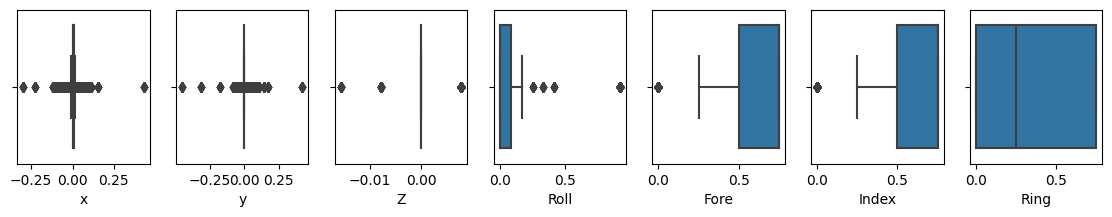

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plots for numerical columns to identify outliers
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(14, 2))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 7, i)
    sns.boxplot(x=df[column])

plt.tight_layout()
plt.show()

# Remove outliers using the IQR method
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Original dataset shape: ", df.shape)
print("Dataset shape after removing outliers: ", df.shape)


In [ ]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Remove rows with missing values
df_no_missing = df.dropna()

# Fill missing values with mean (you can use other strategies as well)
df = df.fillna(df.mean())

print("Dataset shape after removing missing values: ", df_no_missing.shape)
print("Dataset shape after filling missing values: ", df.shape)


Missing values:
 Sign      0
x         0
y         0
Z         0
Roll      0
Fore      0
Index     0
Ring      0
Little    0
dtype: int64
Dataset shape after removing missing values:  (21006, 9)
Dataset shape after filling missing values:  (21006, 9)


<ipython-input-21-483c6c90e170>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [ ]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Sign      0
x         0
y         0
Z         0
Roll      0
Fore      0
Index     0
Ring      0
Little    0
dtype: int64


In [ ]:
df.head(5)

,Sign,x,y,Z,Roll,Fore,Index,Ring,Little
0,alive,-0.007812,0.000000,0.0,0.0,0.50,0.50,0.50,0.50
1,alive,-0.023438,-0.007812,0.0,0.0,0.50,0.50,0.50,0.50
2,alive,-0.031250,-0.015625,0.0,0.0,0.50,0.50,0.50,0.50
3,alive,0.000000,0.000000,0.0,0.0,0.75,0.75,0.75,0.75
4,alive,0.007812,0.000000,0.0,0.0,0.75,0.75,0.75,0.75


In [ ]:
df.columns

Index(['Sign', 'x', 'y', 'Z', 'Roll', 'Fore', 'Index', 'Ring', 'Little'], dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable
plt.figure(figsize=(16, 12),dpi = 800)
sns.countplot(x='Sign', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels by 45 degrees
plt.title('Distribution of Target Variable')
plt.show()
plt.savefig('plot.svg', format='pdf')

<Figure size 640x480 with 0 Axes>

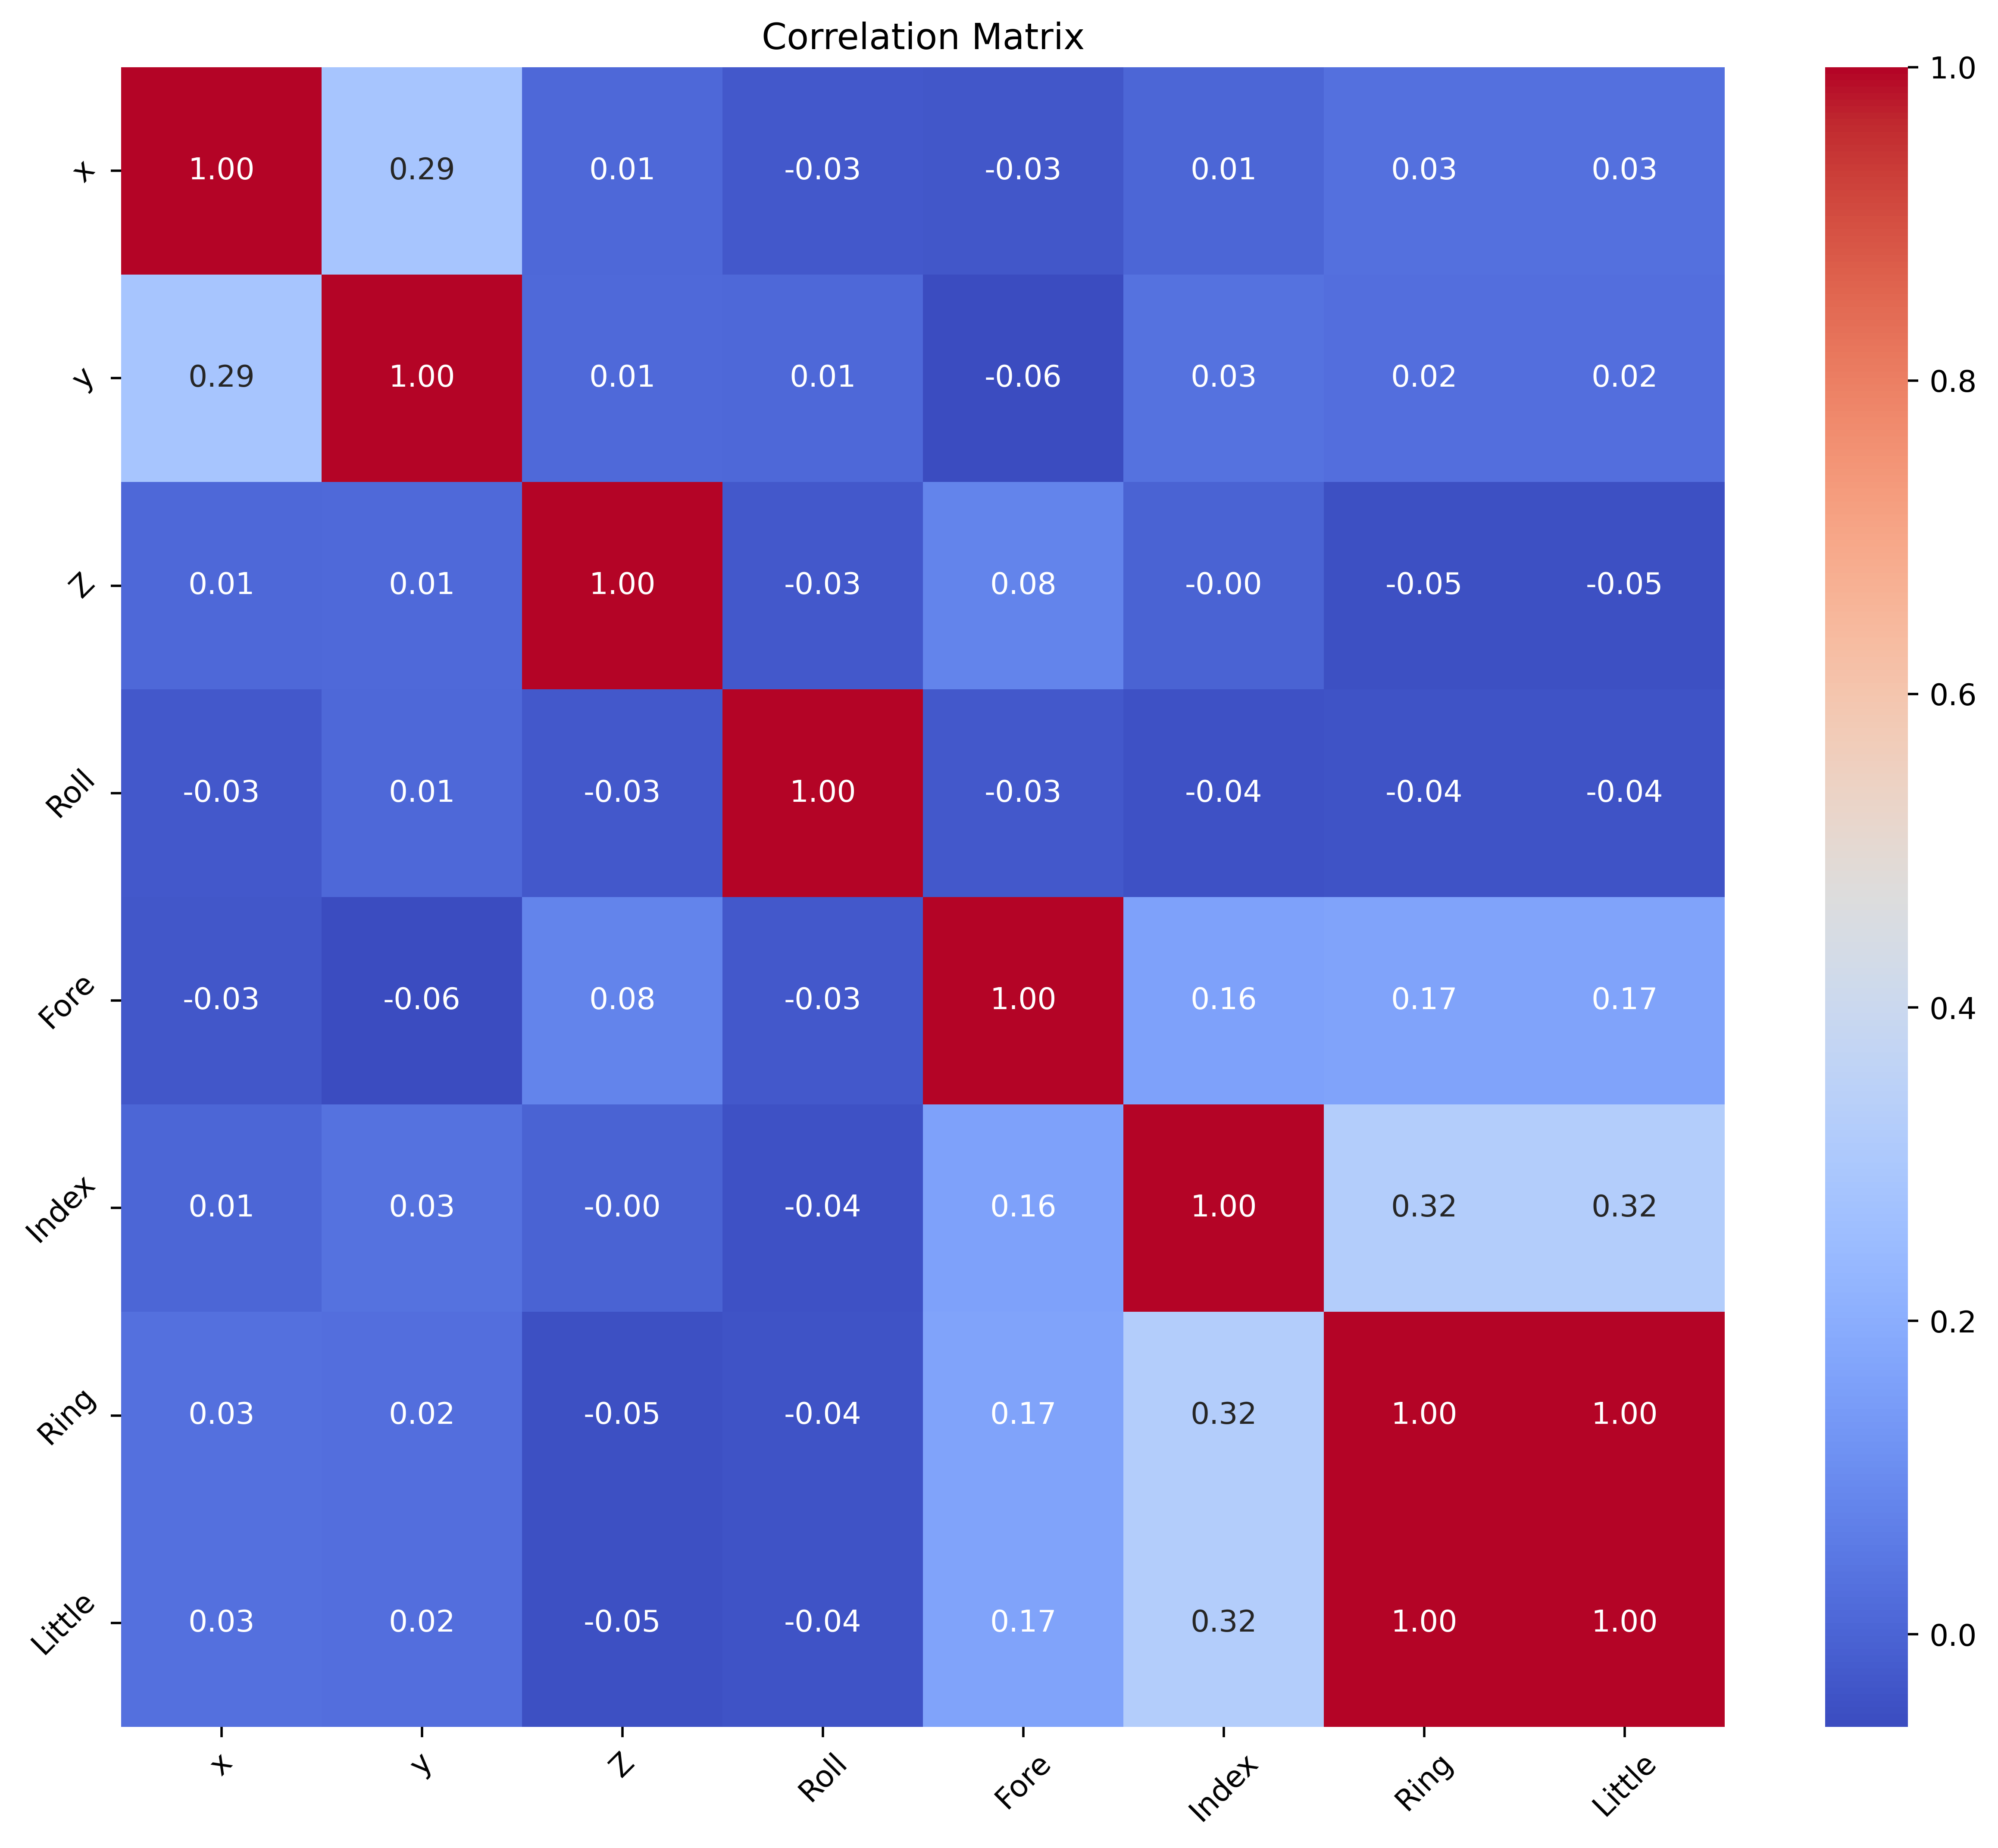

<Figure size 640x480 with 0 Axes>

In [ ]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10),dpi=500)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.yticks(rotation=45)  # Rotate y-axis labels by 45 degrees
plt.show()
plt.savefig('cor_plot.pdf', format='pdf')

x         0.266768
y         0.244929
Fore      0.144127
Index     0.106716
Roll      0.080533
Little    0.057389
Ring      0.056643
Z         0.042895
dtype: float64


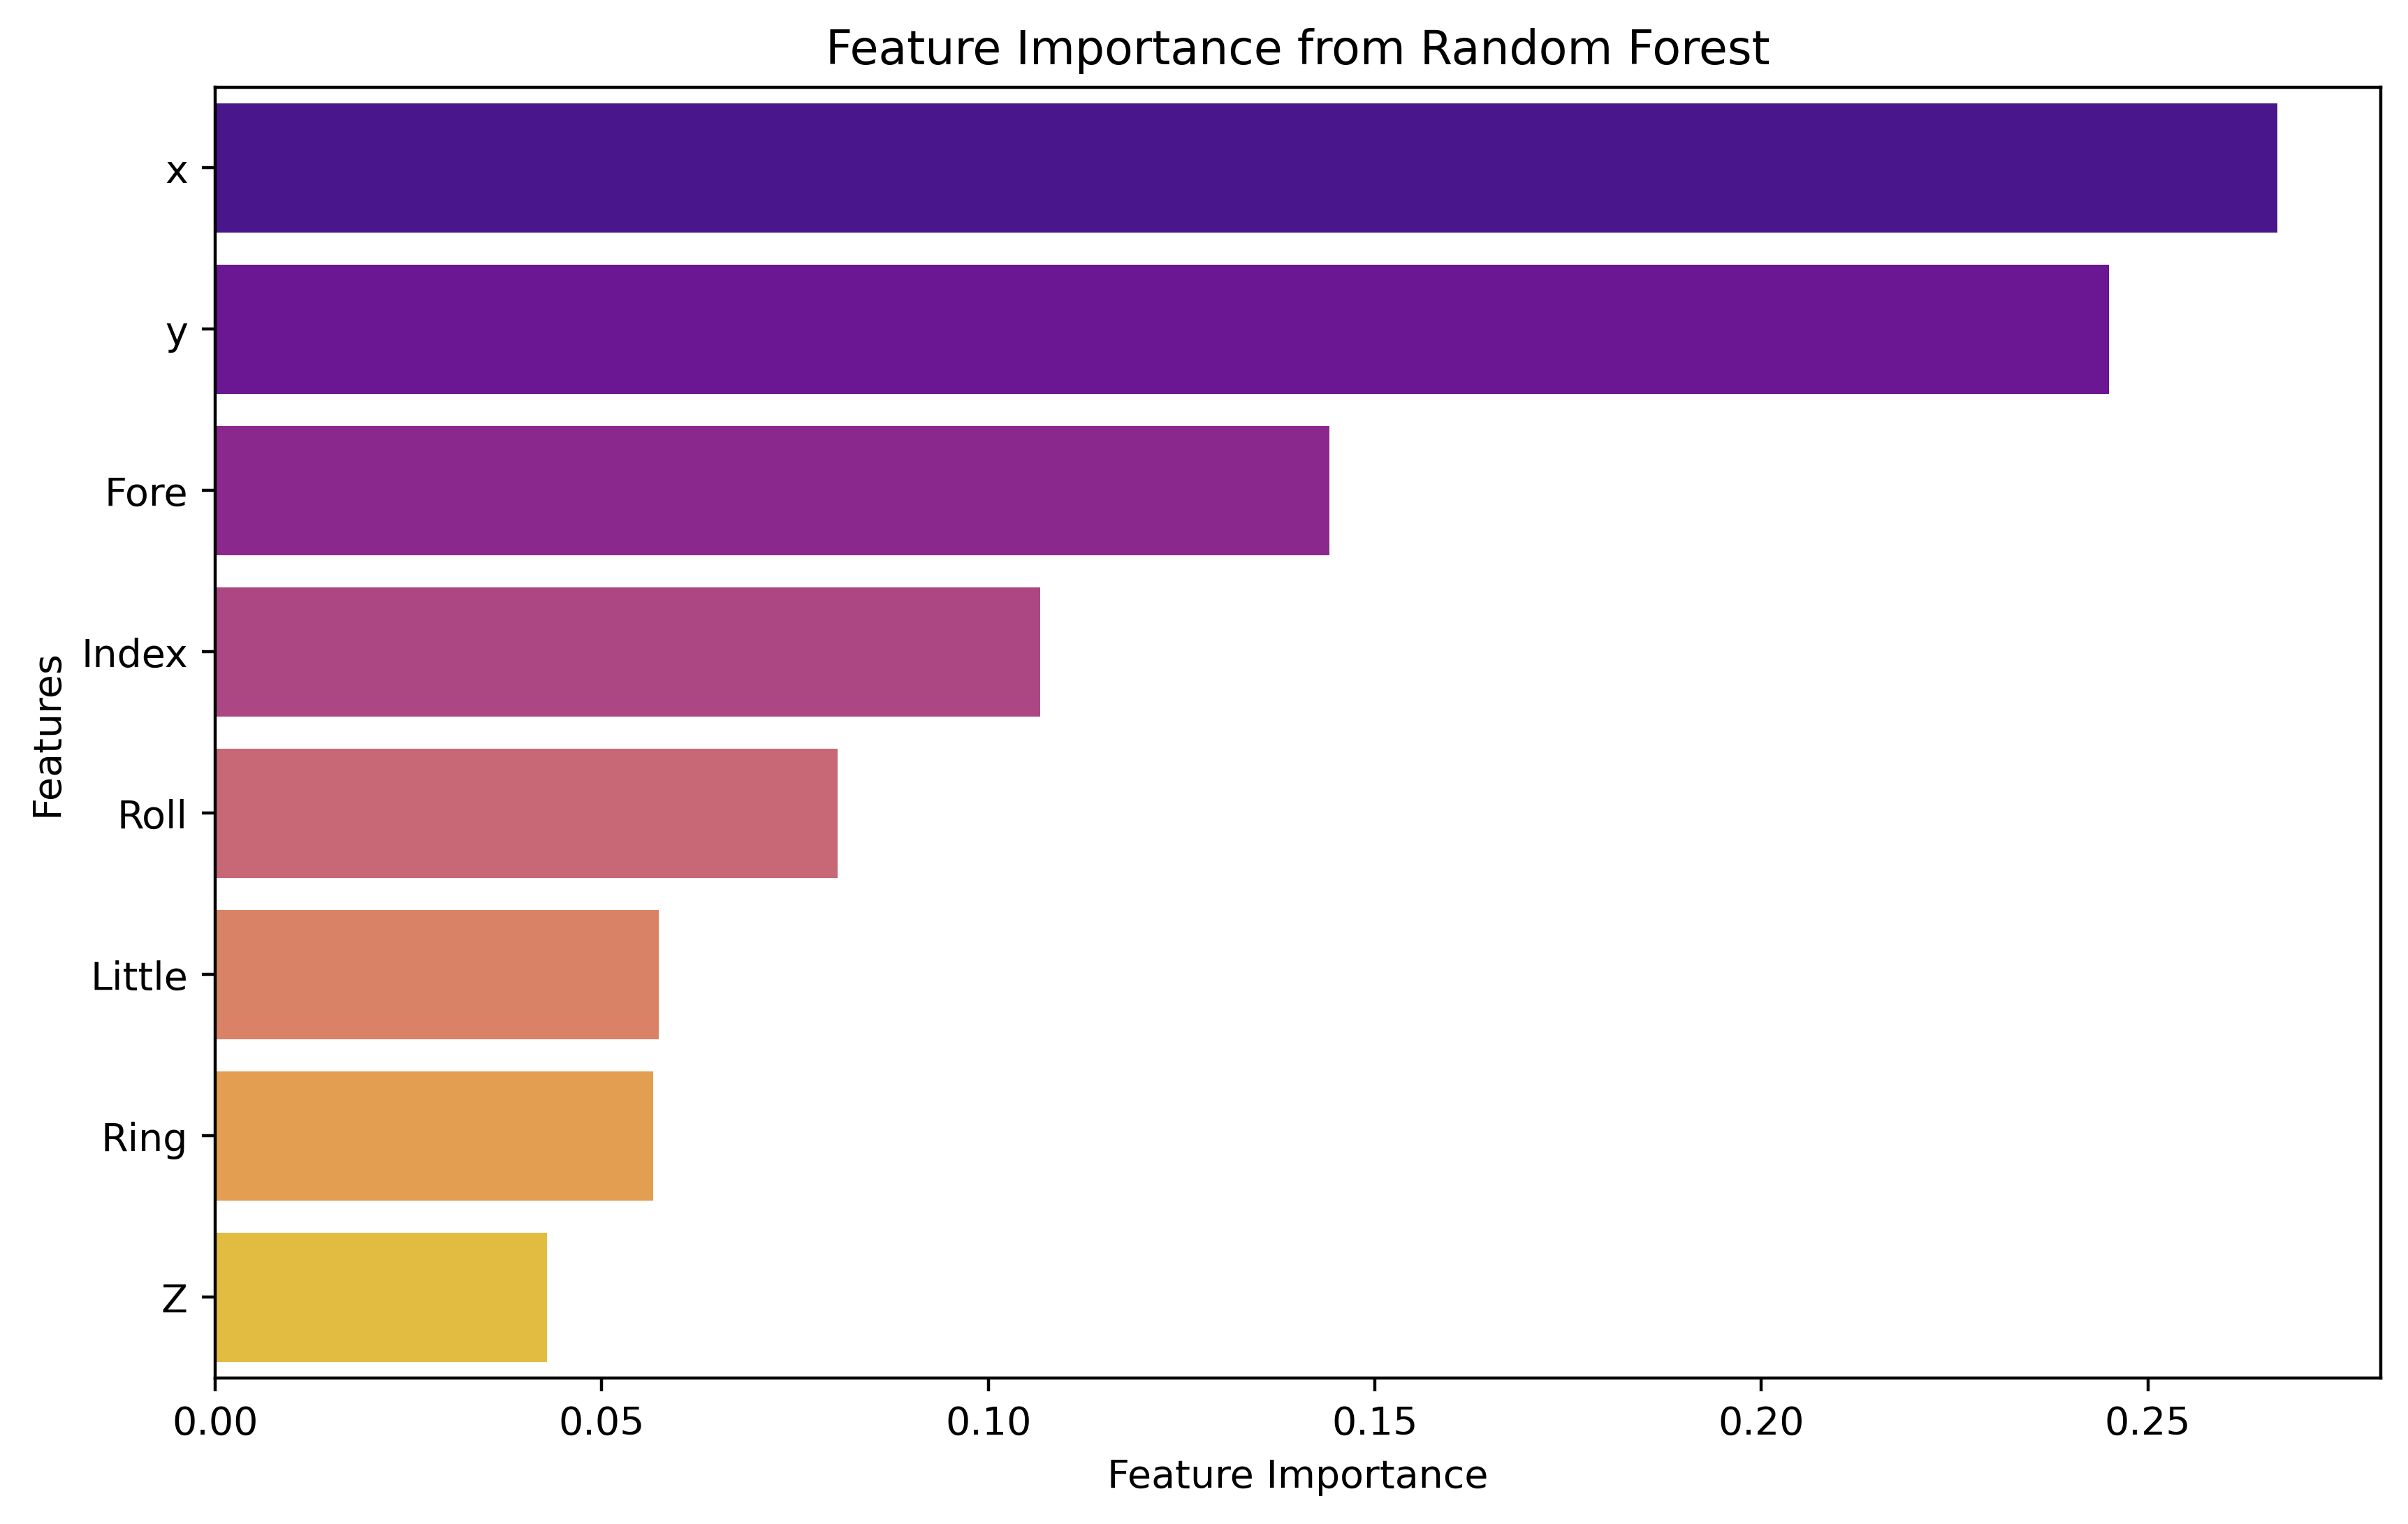

<Figure size 640x480 with 0 Axes>

In [ ]:

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

# Assuming 'target_column' is your target column containing non-numerical values
label_encoder = LabelEncoder()
df['Sign'] = label_encoder.fit_transform(df['Sign'])

X = df.drop('Sign', axis=1)
y = df['Sign']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf.predict(X_test)

# Convert predictions to labels
predicted_labels = label_encoder.inverse_transform(predictions.round().astype(int))
# Feature importance code remains the same as in your original code
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6), dpi=400)
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='plasma')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

plt.savefig('imp_f_plot.svg', format='pdf')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choose the unique values from the target column
target_values = [1, 2]
# subset_df = df[df['Sign'].isin(target_values)]
# Create separate subplots for each column and each unique value
plt.figure(figsize=(15, 10),dpi =800)
legend_labels = {
    1: 'which',
    2: 'girl'
}

# Iterate through columns and create subplots
for i, column in enumerate(df.columns[:-1], 1):  # Exclude the target column from iteration
    plt.subplot(5, 3, i)  # Assuming there are 15 columns, adjust the number based on your dataset

    # Plot histograms for each unique value in the target column
    for target_value in target_values:
        sns.histplot(df[df['Sign'] == target_value][column],label=legend_labels[target_value], kde=True)

    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend()  # Show legend for target values

plt.tight_layout()
plt.show()
plt.savefig('multi_plot.svg', format='pdf')

<Figure size 640x480 with 0 Axes>

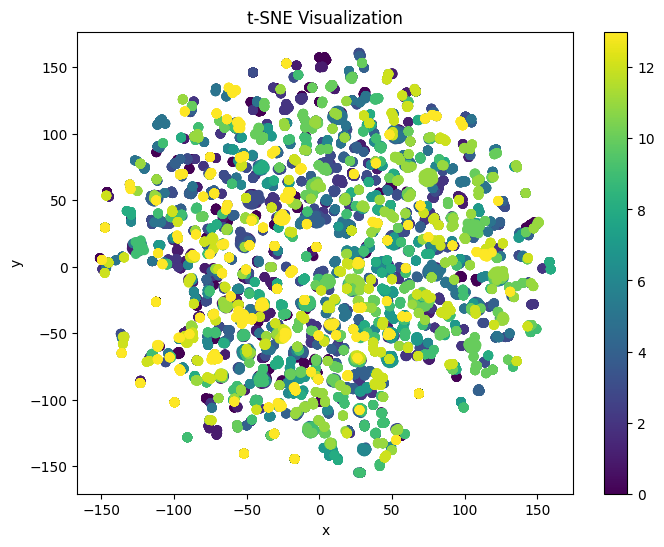

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Instantiate t-SNE with 2 components for 2D visualization
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the high-dimensional data into 2D space
X_tsne = tsne.fit_transform(X)

# Create a scatter plot of the 2D t-SNE representation
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.colorbar()
plt.title('t-SNE Visualization')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
plt.savefig('tsne.svg', format='pdf')

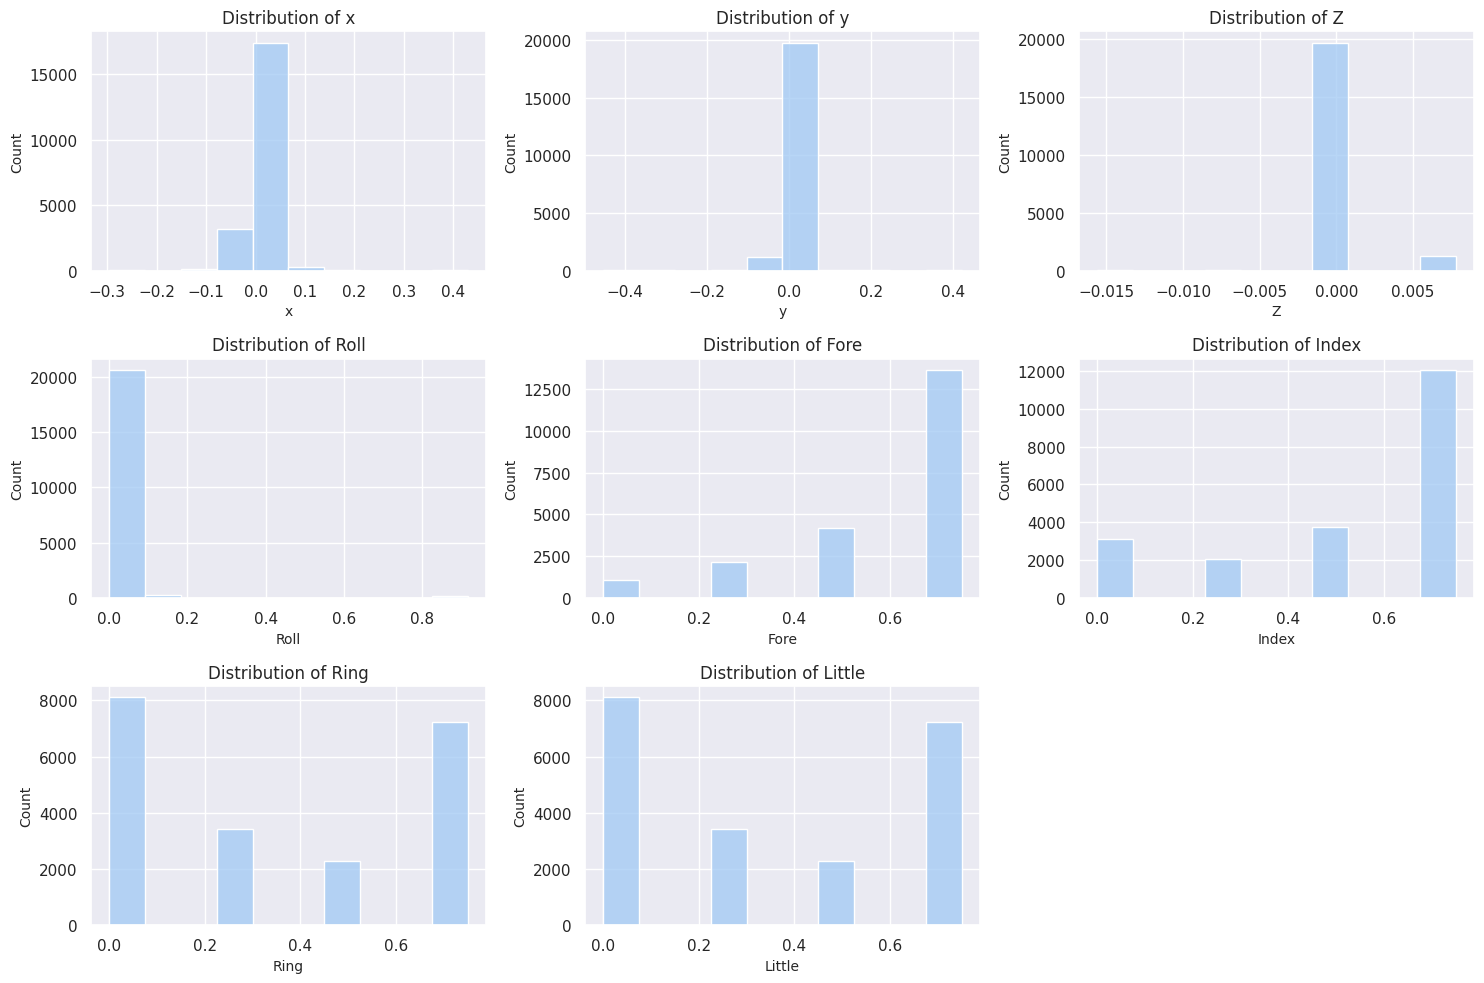

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style and color palette
sns.set(style="darkgrid", palette="pastel")

# Get a list of columns to visualize (excluding the target column)
columns_to_visualize = df.columns[df.columns != 'Sign']

# Create separate histograms for each column (excluding the target column)
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(3, 3, i)  # Assuming there are 15 columns, adjust the number based on your dataset
    sns.histplot(df[column],bins =10)
    plt.title(f'Distribution of {column}', fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Count', fontsize=10)

plt.tight_layout()
plt.show()
plt.savefig('dist.svg', format='pdf')

# Here

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report

# Load your CSV data into a pandas DataFrame
data = pd.read_csv('signs.csv')
data = data.iloc[0:6400]
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Sign'] = label_encoder.fit_transform(data['Sign'])

# Assuming 'features' contains the columns x, y, Fore, Roll, Little, Ring, Z, Index
features = data[['x', 'y', 'Fore', 'Roll', 'Little', 'Ring', 'Z', 'Index']]
labels = data['Sign']  # Assuming 'Sign_Class' is the column containing class labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Multi Class

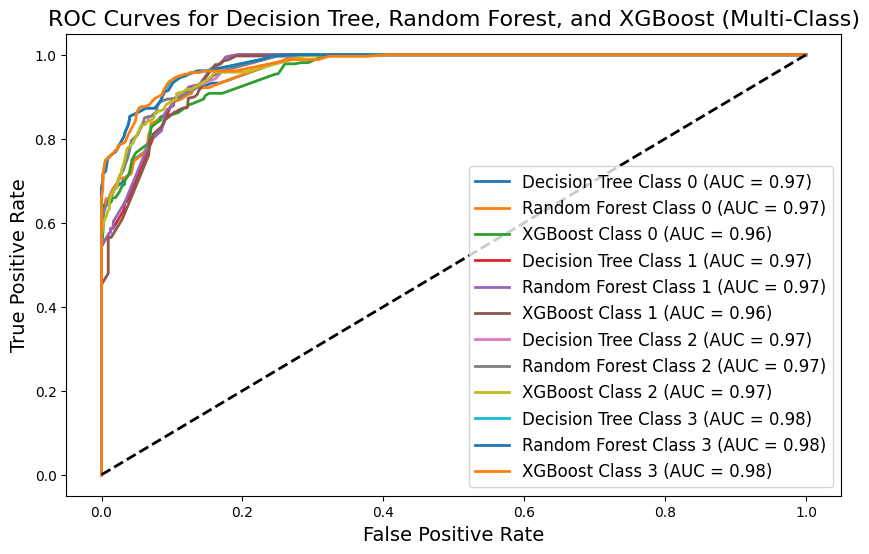

Decision Tree Accuracy: 81.41%
Random Forest Accuracy: 81.25%
XGBoost Accuracy: 81.33%

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       370
           1       0.75      0.86      0.80       338
           2       0.84      0.78      0.81       313
           3       0.89      0.80      0.84       259

    accuracy                           0.81      1280
   macro avg       0.82      0.81      0.82      1280
weighted avg       0.82      0.81      0.81      1280


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       370
           1       0.76      0.85      0.80       338
           2       0.82      0.78      0.80       313
           3       0.88      0.80      0.84       259

    accuracy                           0.81      1280
   macro avg       0.82      0.81      0.81      1280
weighted avg  

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import label_binarize

# Assume y_train and y_test are multiclass labels

# Binarize the output
y_train_bin = label_binarize(y_train, classes=[0,1,2,3])  # Specify your classes
y_test_bin = label_binarize(y_test, classes=[0,1,2,3])

# Create classifiers
dt_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)

# Fit the classifiers
dt_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
dt_probabilities = dt_classifier.predict_proba(X_test)
rf_probabilities = rf_classifier.predict_proba(X_test)
xgb_probabilities = xgb_classifier.predict_proba(X_test)

# Compute the ROC curves and AUC for each class
fpr_dt = dict()
tpr_dt = dict()
roc_auc_dt = dict()

fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()

fpr_xgb = dict()
tpr_xgb = dict()
roc_auc_xgb = dict()
num_classes =4
for i in range(num_classes):  # Specify the number of classes
    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_test_bin[:, i], dt_probabilities[:, i])
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])

    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_bin[:, i], rf_probabilities[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

    fpr_xgb[i], tpr_xgb[i], _ = roc_curve(y_test_bin[:, i], xgb_probabilities[:, i])
    roc_auc_xgb[i] = auc(fpr_xgb[i], tpr_xgb[i])

# Plot the ROC curves for each class with increased font size
plt.figure(figsize=(10, 6))
for i in range(num_classes):  # Specify the number of classes
    plt.plot(fpr_dt[i], tpr_dt[i], lw=2, label='Decision Tree Class {} (AUC = {:.2f})'.format(i, roc_auc_dt[i]))
    plt.plot(fpr_rf[i], tpr_rf[i], lw=2, label='Random Forest Class {} (AUC = {:.2f})'.format(i, roc_auc_rf[i]))
    plt.plot(fpr_xgb[i], tpr_xgb[i], lw=2, label='XGBoost Class {} (AUC = {:.2f})'.format(i, roc_auc_xgb[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves for Decision Tree, Random Forest, and XGBoost (Multi-Class)', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.show()

# Print the accuracies and classification reports
dt_predictions = dt_classifier.predict(X_test)
rf_predictions = rf_classifier.predict(X_test)
xgb_predictions = xgb_classifier.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

print("Decision Tree Accuracy: {:.2f}%".format(dt_accuracy * 100))
print("Random Forest Accuracy: {:.2f}%".format(rf_accuracy * 100))
print("XGBoost Accuracy: {:.2f}%".format(xgb_accuracy * 100))

print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, dt_predictions))

print("\nClassification Report for Random Forest:")
print(classification_report(y_test, rf_predictions))

print("\nClassification Report for XGBoost:")
print(classification_report(y_test, xgb_predictions))

# Decision Tree Classifier

In [ ]:
dt_classifier = DecisionTreeClassifier(max_depth=50, random_state=42)  # Use the same number of components as PCA
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy: {:.2f}%".format(dt_accuracy * 100))
print("Classification Report for Decision Trees:")
print(classification_report(y_test, dt_predictions))

Decision Tree Accuracy: 89.22%
Classification Report for Decision Trees:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       357
           1       0.86      0.91      0.88       283

    accuracy                           0.89       640
   macro avg       0.89      0.89      0.89       640
weighted avg       0.89      0.89      0.89       640



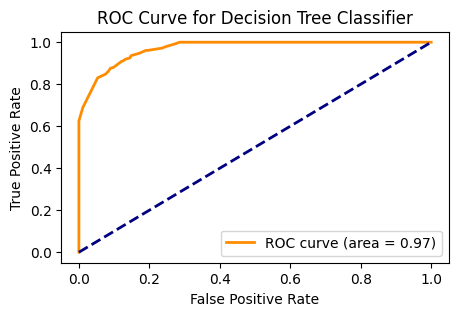

Decision Tree Accuracy: 89.22%
Classification Report for Decision Trees:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       357
           1       0.86      0.91      0.88       283

    accuracy                           0.89       640
   macro avg       0.89      0.89      0.89       640
weighted avg       0.89      0.89      0.89       640



In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Fit the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=50, random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
dt_predictions = dt_classifier.predict(X_test)

# Calculate the probabilities for the positive class (class 1)
dt_probabilities = dt_classifier.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, dt_probabilities)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc='lower right')
plt.show()

# Print the Decision Tree accuracy and classification report
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy: {:.2f}%".format(dt_accuracy * 100))
print("Classification Report for Decision Trees:")
print(classification_report(y_test, dt_predictions))



# Random Forest Classifier

In [ ]:
rf_classifier = RandomForestClassifier(max_depth=50,random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy (with PCA): {:.2f}%".format(rf_accuracy * 100))
print("Classification Report for Random Forest:")
print(classification_report(y_test, rf_predictions))

Random Forest Accuracy (with PCA): 89.22%
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       357
           1       0.86      0.91      0.88       283

    accuracy                           0.89       640
   macro avg       0.89      0.89      0.89       640
weighted avg       0.89      0.89      0.89       640



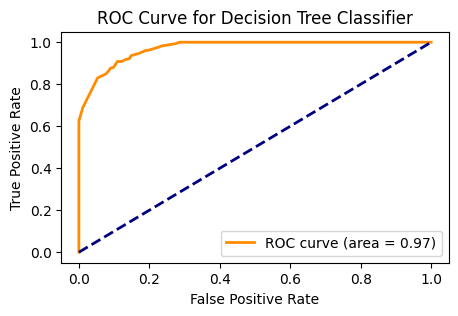

Decision Tree Accuracy: 89.22%
Classification Report for Decision Trees:


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Fit the Decision Tree classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_classifier.predict(X_test)

# Calculate the probabilities for the positive class (class 1)
rf_probabilities = rf_classifier.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_probabilities)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc='lower right')
plt.show()

# Print the Decision Tree accuracy and classification report
dt_accuracy = accuracy_score(y_test, rf_predictions)
print("Decision Tree Accuracy: {:.2f}%".format(rf_accuracy * 100))
print("Classification Report for Decision Trees:")
# print(classification_report(y_test, rf_predictions))


In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create classifiers
rf_classifier = RandomForestClassifier(max_depth=50, random_state=42)
xgb_classifier = XGBClassifier(random_state=42)

# Create an ensemble using VotingClassifier
ensemble_classifier = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('xgboost', xgb_classifier)
], voting='hard')

# Fit the ensemble classifier
ensemble_classifier.fit(X_train, y_train)

# Make predictions
ensemble_predictions = ensemble_classifier.predict(X_test)

# Calculate accuracy and print results
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Accuracy: {:.2f}%".format(ensemble_accuracy * 100))
print("Classification Report for Ensemble:")
print(classification_report(y_test, ensemble_predictions))


Ensemble Accuracy: 89.84%
Classification Report for Ensemble:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       357
           1       0.87      0.91      0.89       283

    accuracy                           0.90       640
   macro avg       0.90      0.90      0.90       640
weighted avg       0.90      0.90      0.90       640



/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


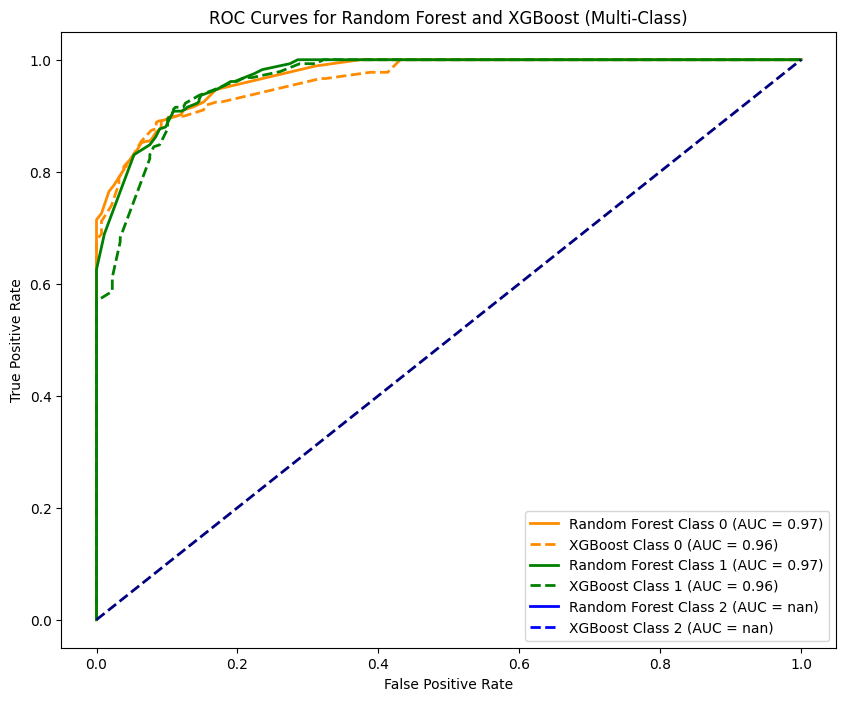

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assume y_train and y_test are multiclass labels

# Binarize the output
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])  # Adjust classes based on your problem
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Create classifiers
rf_classifier = OneVsRestClassifier(RandomForestClassifier(max_depth=50, random_state=42))
xgb_classifier = OneVsRestClassifier(XGBClassifier(random_state=42))

# Fit classifiers
rf_classifier.fit(X_train, y_train_bin)
xgb_classifier.fit(X_train, y_train_bin)

# Predict probabilities for each class
rf_probabilities = rf_classifier.predict_proba(X_test)
xgb_probabilities = xgb_classifier.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()

fpr_xgb = dict()
tpr_xgb = dict()
roc_auc_xgb = dict()

for i in range(3):  # Adjust based on your classes
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_bin[:, i], rf_probabilities[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

    fpr_xgb[i], tpr_xgb[i], _ = roc_curve(y_test_bin[:, i], xgb_probabilities[:, i])
    roc_auc_xgb[i] = auc(fpr_xgb[i], tpr_xgb[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
colors = ['darkorange', 'green', 'blue']  # Adjust based on your classes

for i, color in zip(range(3), colors):
    plt.plot(fpr_rf[i], tpr_rf[i], color=color, lw=2, label='Random Forest Class {} (AUC = {:.2f})'.format(i, roc_auc_rf[i]))
    plt.plot(fpr_xgb[i], tpr_xgb[i], color=color, linestyle='--', lw=2, label='XGBoost Class {} (AUC = {:.2f})'.format(i, roc_auc_xgb[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Random Forest and XGBoost (Multi-Class)')
plt.legend(loc='lower right')
plt.show()


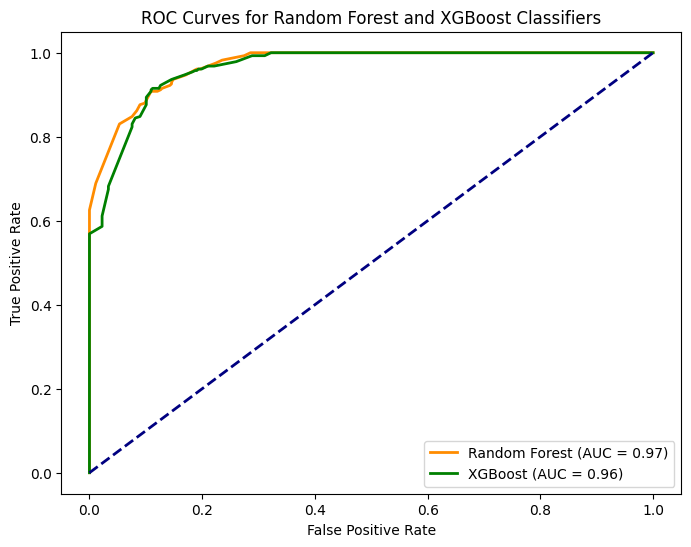

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for each class
rf_probabilities = rf_classifier.predict_proba(X_test)[:, 1]
xgb_probabilities = xgb_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curves and AUC for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_probabilities)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Compute ROC curves and AUC for XGBoost
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgb_probabilities)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curves for both classifiers
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label='XGBoost (AUC = {:.2f})'.format(roc_auc_xgb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Random Forest and XGBoost Classifiers')
plt.legend(loc='lower right')
plt.show()


In [ ]:
print("XGBoost Accuracy: {:.2f}%".format(xgb_accuracy * 100))
print("Classification Report for XGBoost:")
print(classification_report(y_test, xgb_predictions))

XGBoost Accuracy: 90.00%
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       357
           1       0.87      0.91      0.89       283

    accuracy                           0.90       640
   macro avg       0.90      0.90      0.90       640
weighted avg       0.90      0.90      0.90       640



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report

# Define the neural network model
import torch
import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        # Apply softmax activation to the output layer for multi-class classification
        return x

# Instantiate the model
input_size = len(X_train.columns)  # Number of input features
num_classes = 2
model = NeuralNetwork(input_size, num_classes)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
# Example of label encoding for a categorical column

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.int64)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.int64)

# Create DataLoader for training and testing data
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# Training the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Forward pass
        outputs = model(data)
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print training loss for every epoch (optional)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluation
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    predictions = []
    targets = []
    for data, target in test_loader:
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()
        predictions.extend(predicted.tolist())
        targets.extend(target.tolist())

    print('Accuracy on test data: {:.2f}%'.format(100 * correct / total))
    print(classification_report(targets, predictions))

Epoch [1/100], Loss: 0.6117
Epoch [2/100], Loss: 0.5155
Epoch [3/100], Loss: 0.5235
Epoch [4/100], Loss: 0.4997
Epoch [5/100], Loss: 0.6502
Epoch [6/100], Loss: 0.6804
Epoch [7/100], Loss: 0.4051
Epoch [8/100], Loss: 0.5126
Epoch [9/100], Loss: 0.3855
Epoch [10/100], Loss: 0.5389
Epoch [11/100], Loss: 0.3419
Epoch [12/100], Loss: 0.3951
Epoch [13/100], Loss: 0.4174
Epoch [14/100], Loss: 0.4959
Epoch [15/100], Loss: 0.3720
Epoch [16/100], Loss: 0.3553
Epoch [17/100], Loss: 0.4832
Epoch [18/100], Loss: 0.4163
Epoch [19/100], Loss: 0.5539
Epoch [20/100], Loss: 0.3539
Epoch [21/100], Loss: 0.3507
Epoch [22/100], Loss: 0.4102
Epoch [23/100], Loss: 0.3761
Epoch [24/100], Loss: 0.5015
Epoch [25/100], Loss: 0.3885
Epoch [26/100], Loss: 0.4381
Epoch [27/100], Loss: 0.2772
Epoch [28/100], Loss: 0.4089
Epoch [29/100], Loss: 0.3565
Epoch [30/100], Loss: 0.3381
Epoch [31/100], Loss: 0.4731
Epoch [32/100], Loss: 0.3508
Epoch [33/100], Loss: 0.3570
Epoch [34/100], Loss: 0.4699
Epoch [35/100], Loss: 0

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load your CSV data into a pandas DataFrame
data = pd.read_csv('signs.csv')

label_encoder = LabelEncoder()
data['Sign'] = label_encoder.fit_transform(data['Sign'])

# Assuming 'features' contains the columns x, y, Fore, Roll, Little, Ring, Z, Index
features = data[['x', 'y', 'Fore', 'Roll', 'Little', 'Ring', 'Z', 'Index']]
labels = data['Sign']  # Assuming 'Sign_Class' is the column containing class labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Create a list to store accuracies for different numbers of classes
num_classes_list = [2,3,4 ,5,6,7,8,9, 10,11,12,13,14,15,16,17,18,19, 20, 25,30,35,40,45, 50]  # Add more values as needed
accuracies = []

# Train classifiers and evaluate accuracy for each number of classes
for num_classes in num_classes_list:
    # Select a subset of classes
    subset_classes = data['Sign'].unique()[:num_classes]

    # Filter the data for the selected classes
    subset_data = data[data['Sign'].isin(subset_classes)]

    # Verify that there are at least two classes in the subset
    if len(subset_data['Sign'].unique()) < 2:
        print(f"Not enough classes in the subset for num_classes={num_classes}")
        continue

    # Split the filtered data into training and testing sets
    subset_features = subset_data[['x', 'y', 'Fore', 'Roll', 'Little', 'Ring', 'Z', 'Index']]
    subset_labels = subset_data['Sign']
    subset_X_train, subset_X_test, subset_y_train, subset_y_test = train_test_split(subset_features, subset_labels, test_size=0.2, random_state=42)

    # Train classifiers
    dt_classifier = DecisionTreeClassifier(random_state=42)
    rf_classifier = RandomForestClassifier(random_state=42)
    xgb_classifier = XGBClassifier(random_state=42)
    nn_classifier = MLPClassifier(random_state=42, max_iter=100)  # Basic neural network

    dt_classifier.fit(subset_X_train, subset_y_train)
    rf_classifier.fit(subset_X_train, subset_y_train)
    # xgb_classifier.fit(subset_X_train, subset_y_train)
    nn_classifier.fit(subset_X_train, subset_y_train)

    # Make predictions
    dt_predictions = dt_classifier.predict(subset_X_test)
    rf_predictions = rf_classifier.predict(subset_X_test)
    # xgb_predictions = xgb_classifier.predict(subset_X_test)
    nn_predictions = nn_classifier.predict(subset_X_test)

    # Calculate accuracies
    dt_accuracy = accuracy_score(subset_y_test, dt_predictions)
    rf_accuracy = accuracy_score(subset_y_test, rf_predictions)
    # xgb_accuracy = accuracy_score(subset_y_test, xgb_predictions)
    nn_accuracy = accuracy_score(subset_y_test, nn_predictions)

    # Append accuracies to the list
    accuracies.append({
        'num_classes': num_classes,
        'DecisionTreeAccuracy': dt_accuracy,
        'RandomForestAccuracy': rf_accuracy,
        # 'XGBoostAccuracy': xgb_accuracy,
        'NeuralNetworkAccuracy': nn_accuracy
    })

# Convert the list of accuracies to a DataFrame
accuracy_df = pd.DataFrame(accuracies)

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(accuracy_df['num_classes'], accuracy_df['DecisionTreeAccuracy'], marker='o', label='Decision Tree')
plt.plot(accuracy_df['num_classes'], accuracy_df['RandomForestAccuracy'], marker='o', label='Random Forest')
# plt.plot(accuracy_df['num_classes'], accuracy_df['XGBoostAccuracy'], marker='o', label='XGBoost')
plt.plot(accuracy_df['num_classes'], accuracy_df['NeuralNetworkAccuracy'], marker='o', label='Neural Network')
plt.xlabel('Number of Classes')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Classes for Different Classifiers')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Convert the list of accuracies to a DataFrame
accuracy_df = pd.DataFrame(accuracies)

# Plotting
plt.figure(figsize=(9, 6))
plt.plot(accuracy_df['num_classes'], accuracy_df['DecisionTreeAccuracy'], marker='o', label='Decision Tree')
plt.plot(accuracy_df['num_classes'], accuracy_df['RandomForestAccuracy'], marker='x', label='Random Forest')
# plt.plot(accuracy_df['num_classes'], accuracy_df['XGBoostAccuracy'], marker='o', label='XGBoost')
plt.plot(accuracy_df['num_classes'], accuracy_df['NeuralNetworkAccuracy'], marker='o', label='Neural Network')
plt.xlabel('Number of Classes')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Classes for Different Classifiers')
plt.legend()
plt.grid(True)
plt.show()